In [1]:
%%time
import malaya

CPU times: user 11.9 s, sys: 1.48 s, total: 13.4 s
Wall time: 17.4 s


## List available deep learning NER models

In [2]:
malaya.entity.available_deep_model()

['concat', 'bahdanau', 'luong', 'entity-network', 'attention']

## Describe supported entities

In [3]:
malaya.describe_entities()

OTHER - Other
law - law, regulation, related law documents, documents, etc
location - location, place
organization - organization, company, government, facilities, etc
person - person, group of people, believes, etc
quantity - numbers, quantity
time - date, day, time, etc
event - unique event happened, etc


In [4]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'

## Load CRF model

In [5]:
crf = malaya.entity.crf()
crf.predict(string)

[('kuala', 'location'),
 ('lumpur', 'location'),
 ('sempena', 'OTHER'),
 ('sambutan', 'event'),
 ('aidilfitri', 'event'),
 ('minggu', 'OTHER'),
 ('depan', 'OTHER'),
 ('perdana', 'person'),
 ('menteri', 'person'),
 ('tun', 'person'),
 ('dr', 'person'),
 ('mahathir', 'person'),
 ('mohamad', 'person'),
 ('dan', 'OTHER'),
 ('menteri', 'OTHER'),
 ('pengangkutan', 'OTHER'),
 ('anthony', 'person'),
 ('loke', 'person'),
 ('siew', 'person'),
 ('fook', 'person'),
 ('menitipkan', 'OTHER'),
 ('pesanan', 'OTHER'),
 ('khas', 'OTHER'),
 ('kepada', 'OTHER'),
 ('orang', 'OTHER'),
 ('ramai', 'OTHER'),
 ('yang', 'OTHER'),
 ('mahu', 'OTHER'),
 ('pulang', 'OTHER'),
 ('ke', 'OTHER'),
 ('kampung', 'location'),
 ('halaman', 'location'),
 ('masing-masing', 'OTHER'),
 ('dalam', 'OTHER'),
 ('video', 'OTHER'),
 ('pendek', 'OTHER'),
 ('terbitan', 'OTHER'),
 ('jabatan', 'organization'),
 ('keselamatan', 'organization'),
 ('jalan', 'organization'),
 ('raya', 'organization'),
 ('jkjr', 'organization'),
 ('itu', 'OTHE

## Load Case-Sensitive CRF model

In [6]:
crf = malaya.entity.crf(sensitive = True)
crf.predict(string)

[('Kuala', 'location'),
 ('Lumpur', 'location'),
 ('Sempena', 'OTHER'),
 ('sambutan', 'OTHER'),
 ('Aidilfitri', 'event'),
 ('minggu', 'OTHER'),
 ('depan', 'OTHER'),
 ('Perdana', 'person'),
 ('Menteri', 'person'),
 ('Tun', 'person'),
 ('Dr', 'person'),
 ('Mahathir', 'person'),
 ('Mohamad', 'person'),
 ('dan', 'OTHER'),
 ('Menteri', 'organization'),
 ('Pengangkutan', 'organization'),
 ('Anthony', 'person'),
 ('Loke', 'person'),
 ('Siew', 'person'),
 ('Fook', 'person'),
 ('menitipkan', 'OTHER'),
 ('pesanan', 'OTHER'),
 ('khas', 'OTHER'),
 ('kepada', 'OTHER'),
 ('orang', 'OTHER'),
 ('ramai', 'OTHER'),
 ('yang', 'OTHER'),
 ('mahu', 'OTHER'),
 ('pulang', 'OTHER'),
 ('ke', 'OTHER'),
 ('kampung', 'location'),
 ('halaman', 'location'),
 ('masing-masing', 'OTHER'),
 ('Dalam', 'OTHER'),
 ('video', 'OTHER'),
 ('pendek', 'OTHER'),
 ('terbitan', 'OTHER'),
 ('Jabatan', 'organization'),
 ('Keselamatan', 'organization'),
 ('Jalan', 'organization'),
 ('Raya', 'organization'),
 ('Jkjr', 'organization'),


## Print important features from CRF model

In [7]:
crf.print_features(10)

Top-10 positive:
14.340635 person   word:pengarah
11.162717 person   prev_word:perbendaharaan
10.906426 location word:dibuat-buat
10.462828 person   word:berkelulusan
9.680613 organization word:pas
9.152880 person   word:Presidennya
8.668067 OTHER    prev_word:bergabungnya
8.637761 location word:Iran
8.336057 person   word:dinaungi
8.233552 person   word:Johan

Top-10 negative:
-5.274524 OTHER    prev_word:pelantikan
-5.344889 OTHER    word:pembangkang
-5.375710 OTHER    word:terminal
-5.699221 person   is_numeric
-5.855398 organization suffix-3:ari
-6.036876 OTHER    word:memintanya
-6.082631 OTHER    word:pengasuhnya
-6.278501 person   next_word-prefix-2:Kp
-6.818189 OTHER    prefix-3:di-
-7.422581 person   suffix-3:ada


## Print important transitions from CRF Model

In [8]:
crf.print_transitions(10)

Top-10 likely transitions:
OTHER  -> OTHER   4.720173
organization -> organization 4.512877
event  -> event   4.286578
quantity -> quantity 4.244444
person -> person  4.099601
location -> location 4.051204
law    -> law     3.888215
time   -> time    2.618322
OTHER  -> location 0.361435
OTHER  -> person  0.255809

Top-10 unlikely transitions:
organization -> event   -4.005846
quantity -> location -4.030371
law    -> organization -4.154642
time   -> person  -4.226871
quantity -> organization -4.251120
person -> law     -4.379608
law    -> time    -4.421451
organization -> time    -4.700082
time   -> quantity -7.386138
quantity -> time    -7.824427


## Load deep learning models

In [9]:
for i in malaya.entity.available_deep_model():
    print('Testing %s model'%(i))
    model = malaya.entity.deep_model(i)
    print(model.predict(string))
    print()

Testing concat model
[('kuala', 'location'), ('lumpur', 'location'), ('sempena', 'OTHER'), ('sambutan', 'event'), ('aidilfitri', 'event'), ('minggu', 'time'), ('depan', 'time'), ('perdana', 'person'), ('menteri', 'person'), ('tun', 'person'), ('dr', 'person'), ('mahathir', 'person'), ('mohamad', 'person'), ('dan', 'OTHER'), ('menteri', 'OTHER'), ('pengangkutan', 'OTHER'), ('anthony', 'person'), ('loke', 'person'), ('siew', 'person'), ('fook', 'person'), ('menitipkan', 'OTHER'), ('pesanan', 'OTHER'), ('khas', 'OTHER'), ('kepada', 'OTHER'), ('orang', 'OTHER'), ('ramai', 'OTHER'), ('yang', 'OTHER'), ('mahu', 'OTHER'), ('pulang', 'OTHER'), ('ke', 'OTHER'), ('kampung', 'location'), ('halaman', 'location'), ('masing-masing', 'OTHER'), ('dalam', 'OTHER'), ('video', 'OTHER'), ('pendek', 'OTHER'), ('terbitan', 'OTHER'), ('jabatan', 'OTHER'), ('keselamatan', 'OTHER'), ('jalan', 'location'), ('raya', 'organization'), ('jkjr', 'event'), ('itu', 'OTHER'), ('dr', 'person'), ('mahathir', 'person'), (

## Load Case-Sensitive deep learning models

In [10]:
for i in malaya.entity.available_deep_model():
    print('Testing %s model'%(i))
    model = malaya.entity.deep_model(i, sensitive = True)
    print(model.predict(string))
    print()

Testing concat model
[('Kuala', 'location'), ('Lumpur', 'location'), ('Sempena', 'OTHER'), ('sambutan', 'time'), ('Aidilfitri', 'time'), ('minggu', 'OTHER'), ('depan', 'OTHER'), ('Perdana', 'person'), ('Menteri', 'person'), ('Tun', 'person'), ('Dr', 'person'), ('Mahathir', 'person'), ('Mohamad', 'person'), ('dan', 'OTHER'), ('Menteri', 'person'), ('Pengangkutan', 'person'), ('Anthony', 'person'), ('Loke', 'person'), ('Siew', 'person'), ('Fook', 'person'), ('menitipkan', 'OTHER'), ('pesanan', 'person'), ('khas', 'OTHER'), ('kepada', 'OTHER'), ('orang', 'person'), ('ramai', 'OTHER'), ('yang', 'OTHER'), ('mahu', 'OTHER'), ('pulang', 'OTHER'), ('ke', 'OTHER'), ('kampung', 'location'), ('halaman', 'OTHER'), ('masing-masing', 'OTHER'), ('Dalam', 'OTHER'), ('video', 'OTHER'), ('pendek', 'OTHER'), ('terbitan', 'OTHER'), ('Jabatan', 'organization'), ('Keselamatan', 'organization'), ('Jalan', 'organization'), ('Raya', 'law'), ('Jkjr', 'time'), ('itu', 'time'), ('Dr', 'person'), ('Mahathir', 'per

## Print important features from deep learning model

In [11]:
bahdanau = malaya.entity.deep_model('bahdanau')
bahdanau.print_features(10)

Top-10 positive:
made: 4.456522
effendi: 3.826650
dipo: 3.723355
djamil: 3.653246
noorfadila: 3.638877
ahad: 3.611547
kinabalu: 3.601939
yorrys: 3.546461
2008: 3.510597
ustaz: 3.450228

Top-10 negative:
memilih: -3.813004
gentar: -3.738811
kenalan: -3.586572
melanjutkan: -3.510132
istilah: -3.410603
seusai: -3.405963
kepolisian: -3.371908
perwira: -3.364473
padi: -3.242083
perusahaan: -3.196474


## Print important transitions from deep learning model

In [12]:
bahdanau.print_transitions(10)

Top-10 likely transitions:
quantity -> quantity: 0.768479
law -> law: 0.748858
event -> event: 0.671466
time -> time: 0.566861
quantity -> PAD: 0.515885
organization -> time: 0.430649
PAD -> law: 0.396928
time -> person: 0.387298
time -> organization: 0.380183
OTHER -> time: 0.346963

Top-10 unlikely transitions:
person -> law: -0.959066
law -> person: -0.763240
event -> organization: -0.744430
person -> event: -0.647477
time -> event: -0.640794
law -> OTHER: -0.634643
organization -> event: -0.629229
organization -> OTHER: -0.606970
OTHER -> law: -0.598875
OTHER -> event: -0.598665


## Visualize output alignment from attention

This visualization only can call from `bahdanau` or `luong` model.

In [14]:
d_object, predicted, state_fw, state_bw = bahdanau.get_alignment(string)

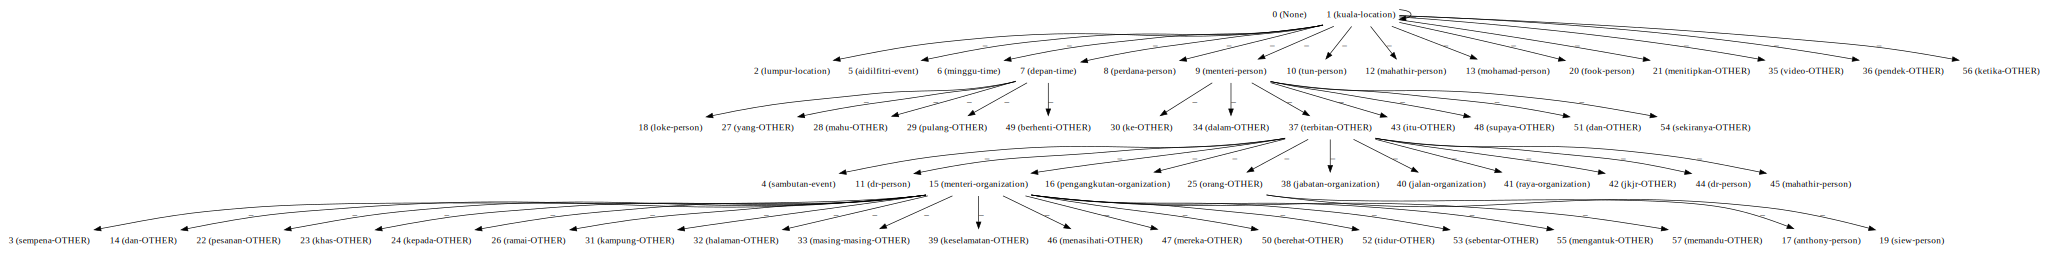

In [16]:
d_object.to_graphvis()

## Voting stack model

In [18]:
entity_network = malaya.entity.deep_model('entity-network')
bahdanau = malaya.entity.deep_model('bahdanau')
luong = malaya.entity.deep_model('luong')
malaya.stack.voting_stack([entity_network, bahdanau, luong], string)

[('kuala', 'location'),
 ('lumpur', 'location'),
 ('sempena', 'OTHER'),
 ('sambutan', 'event'),
 ('aidilfitri', 'event'),
 ('minggu', 'time'),
 ('depan', 'time'),
 ('perdana', 'person'),
 ('menteri', 'person'),
 ('tun', 'person'),
 ('dr', 'person'),
 ('mahathir', 'person'),
 ('mohamad', 'person'),
 ('dan', 'OTHER'),
 ('menteri', 'OTHER'),
 ('pengangkutan', 'OTHER'),
 ('anthony', 'person'),
 ('loke', 'person'),
 ('siew', 'person'),
 ('fook', 'person'),
 ('menitipkan', 'OTHER'),
 ('pesanan', 'OTHER'),
 ('khas', 'OTHER'),
 ('kepada', 'OTHER'),
 ('orang', 'OTHER'),
 ('ramai', 'OTHER'),
 ('yang', 'OTHER'),
 ('mahu', 'OTHER'),
 ('pulang', 'OTHER'),
 ('ke', 'OTHER'),
 ('kampung', 'OTHER'),
 ('halaman', 'OTHER'),
 ('masing-masing', 'OTHER'),
 ('dalam', 'OTHER'),
 ('video', 'OTHER'),
 ('pendek', 'OTHER'),
 ('terbitan', 'OTHER'),
 ('jabatan', 'organization'),
 ('keselamatan', 'OTHER'),
 ('jalan', 'organization'),
 ('raya', 'organization'),
 ('jkjr', 'organization'),
 ('itu', 'OTHER'),
 ('dr', 'p